/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segment Analysis:
         CustomerID  PurchaseFrequency  AverageOrderValue  EngagementScore  \
Segment                                                                      
0        491.021341          35.228659         339.497685         0.514198   
1        504.551387          16.278956         218.600453         0.521824   
2        511.101695          57.711864         435.643809         0.506740   

         TotalPurchaseAmount  CustomerLifecycleValue  
Segment                                               
0               10939.781564               21.850610  
1                2878.025955                5.199021  
2               24975.187659               50.830508  

Feature Importances:
             Feature  Importance
0  PurchaseFrequency    0.630993
1  AverageOrderValue    0.366008
2    EngagementScore    0.003000


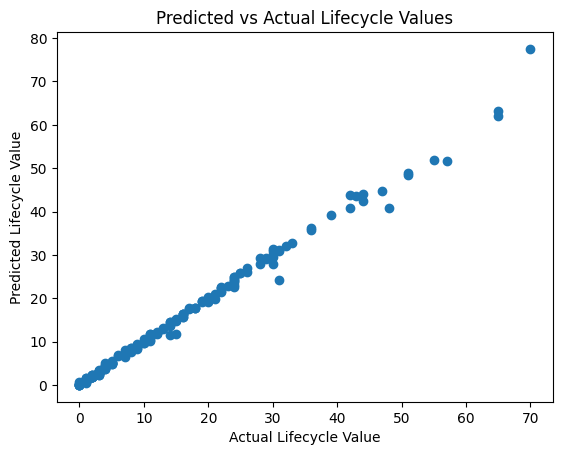

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = '/content/customer_lifecycle_dataset.csv'
customer_features = pd.read_csv(dataset_path)

# Feature Engineering
features = ['PurchaseFrequency', 'AverageOrderValue', 'EngagementScore']
X = customer_features[features]
y = customer_features['CustomerLifecycleValue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict customer lifecycle values on the test set
predictions = rf_model.predict(X_test)

# Customer Segmentation using KMeans
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(customer_features[['CustomerLifecycleValue']])
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Segment'] = kmeans.fit_predict(X_scaled)

# Analyze characteristics of each segment
segment_analysis = customer_features.groupby('Segment').mean()

# Save the updated dataset with segments
customer_features.to_csv('/content/customer_lifecycle_dataset.csv', index=False)

# Display segment analysis
print("Segment Analysis:")
print(segment_analysis)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("\nFeature Importances:")
print(feature_importances)

# Visualize predicted vs actual lifecycle values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Lifecycle Value')
plt.ylabel('Predicted Lifecycle Value')
plt.title('Predicted vs Actual Lifecycle Values')
plt.show()
